In [32]:
# conda activate covid19
import numpy as np
import pandas as pd
import matplotlib
np.__version__, pd.__version__, matplotlib.__version__

('1.19.2', '1.2.2', '3.3.4')

In [2]:
phuDf = pd.read_csv('PublicHealthUnits.csv',
                   header=0,
                   index_col='Reporting_PHU_ID')

In [3]:
phuDf.head(10)

,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
Reporting_PHU_ID,,,,,,,
2253,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2236,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/,43.413997,-79.744796
2266,Wellington-Dufferin-Guelph Public Health,160 Chancellors Way,Guelph,N1G 0E1,www.wdgpublichealth.ca,43.524881,-80.233743
2241,"Kingston, Frontenac and Lennox & Addington Pub...",221 Portsmouth Avenue,Kingston,K7M 1V5,www.kflaph.ca,44.227874,-76.525211
3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2233,Grey Bruce Health Unit,101 17th Street East,Owen Sound,N4K 0A5,www.publichealthgreybruce.on.ca/,44.576196,-80.940980
2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2230,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341
2242,Lambton Public Health,160 Exmouth Street,Point Edward,N7T 7Z6,www.lambtonhealth.on.ca,42.986416,-82.404808


In [4]:
phuDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 2253 to 2243
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reporting_PHU              34 non-null     object 
 1   Reporting_PHU_Address      34 non-null     object 
 2   Reporting_PHU_City         34 non-null     object 
 3   Reporting_PHU_Postal_Code  34 non-null     object 
 4   Reporting_PHU_Website      34 non-null     object 
 5   Reporting_PHU_Latitude     34 non-null     float64
 6   Reporting_PHU_Longitude    34 non-null     float64
dtypes: float64(2), object(5)
memory usage: 2.1+ KB


In [5]:
caseDf = pd.read_csv('PositiveCases.csv', 
                        header=0, 
                        index_col='Row_ID',
                        parse_dates=['Case_Reported_Date'])

In [6]:
caseDf.head(10)

,Case_Reported_Date,Reporting_PHU_ID,AgeGroupId,ClientGenderId,CaseAcquisitionInfoId,Outcome1Id,OutbreakRelatedId
Row_ID,,,,,,,
1,2020-04-24,2253,4,1,2,0,1
2,2020-06-05,2253,5,1,2,0,1
3,2020-03-30,2253,4,2,1,0,0
4,2020-05-18,2253,4,1,1,0,0
5,2020-04-11,2253,4,1,1,0,0
6,2020-05-25,2253,6,2,1,0,0
7,2020-05-13,2253,4,2,4,2,0
8,2020-06-16,2253,4,1,4,0,0
9,2020-04-23,2253,3,1,1,0,0


In [7]:
caseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294144 entries, 1 to 294144
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Case_Reported_Date     294144 non-null  datetime64[ns]
 1   Reporting_PHU_ID       294144 non-null  int64         
 2   AgeGroupId             294144 non-null  int64         
 3   ClientGenderId         294144 non-null  int64         
 4   CaseAcquisitionInfoId  294144 non-null  int64         
 5   Outcome1Id             294144 non-null  int64         
 6   OutbreakRelatedId      294144 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 18.0 MB


In [8]:
# add in a year and week number
caseDf['Case_Reported_Year'] = caseDf['Case_Reported_Date'].dt.isocalendar().year
caseDf['Case_Reported_WeekNo'] = caseDf['Case_Reported_Date'].dt.isocalendar().week
caseDf.head(10)

,Case_Reported_Date,Reporting_PHU_ID,AgeGroupId,ClientGenderId,CaseAcquisitionInfoId,Outcome1Id,OutbreakRelatedId,Case_Reported_Year,Case_Reported_WeekNo
Row_ID,,,,,,,,,
1,2020-04-24,2253,4,1,2,0,1,2020,17
2,2020-06-05,2253,5,1,2,0,1,2020,23
3,2020-03-30,2253,4,2,1,0,0,2020,14
4,2020-05-18,2253,4,1,1,0,0,2020,21
5,2020-04-11,2253,4,1,1,0,0,2020,15
6,2020-05-25,2253,6,2,1,0,0,2020,22
7,2020-05-13,2253,4,2,4,2,0,2020,20
8,2020-06-16,2253,4,1,4,0,0,2020,25
9,2020-04-23,2253,3,1,1,0,0,2020,17


In [9]:
caseDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294144 entries, 1 to 294144
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Case_Reported_Date     294144 non-null  datetime64[ns]
 1   Reporting_PHU_ID       294144 non-null  int64         
 2   AgeGroupId             294144 non-null  int64         
 3   ClientGenderId         294144 non-null  int64         
 4   CaseAcquisitionInfoId  294144 non-null  int64         
 5   Outcome1Id             294144 non-null  int64         
 6   OutbreakRelatedId      294144 non-null  int64         
 7   Case_Reported_Year     294144 non-null  UInt32        
 8   Case_Reported_WeekNo   294144 non-null  UInt32        
dtypes: UInt32(2), datetime64[ns](1), int64(6)
memory usage: 20.8 MB


In [10]:
# From the original notebook ... we want to reverse them ..
ageGroup = {'UNKNOWN':0, '<20':1, '20s':2, '30s':3, '40s':4, '50s':5, '60s':6, '70s':7, '80s':8, '90+':9}
clientGender = {'UNSPECIFIED':0, 'FEMALE':1, 'MALE':2, 'GENDER DIVERSE':3}
caseAcquistionInfo = {'MISSING INFORMATION':0, 'CC':1, 'OB':2, 'TRAVEL':3, 'NO KNOWN EPI LINK':4, 'UNSPECIFIED EPI LINK':5}
outcome1 = {'Resolved':0, 'Not Resolved':1, 'Fatal':2}
outbreakRelated = {'No':0, 'Yes':1}

In [11]:
print(ageGroup)
print(clientGender)
print(caseAcquistionInfo)
print(outcome1)
print(outbreakRelated)

{'UNKNOWN': 0, '<20': 1, '20s': 2, '30s': 3, '40s': 4, '50s': 5, '60s': 6, '70s': 7, '80s': 8, '90+': 9}
{'UNSPECIFIED': 0, 'FEMALE': 1, 'MALE': 2, 'GENDER DIVERSE': 3}
{'MISSING INFORMATION': 0, 'CC': 1, 'OB': 2, 'TRAVEL': 3, 'NO KNOWN EPI LINK': 4, 'UNSPECIFIED EPI LINK': 5}
{'Resolved': 0, 'Not Resolved': 1, 'Fatal': 2}
{'No': 0, 'Yes': 1}


In [12]:
# switch the key/values to values/keys
ageGroup = dict((y,x) for x,y in ageGroup.items())
clientGender = dict((y,x) for x,y in clientGender.items())
caseAcquistionInfo = dict((y,x) for x,y in caseAcquistionInfo.items())
outcome1 = dict((y,x) for x,y in outcome1.items())
outbreakRelated = dict((y,x) for x,y in outbreakRelated.items())

In [13]:
print(ageGroup)
print(clientGender)
print(caseAcquistionInfo)
print(outcome1)
print(outbreakRelated)

{0: 'UNKNOWN', 1: '<20', 2: '20s', 3: '30s', 4: '40s', 5: '50s', 6: '60s', 7: '70s', 8: '80s', 9: '90+'}
{0: 'UNSPECIFIED', 1: 'FEMALE', 2: 'MALE', 3: 'GENDER DIVERSE'}
{0: 'MISSING INFORMATION', 1: 'CC', 2: 'OB', 3: 'TRAVEL', 4: 'NO KNOWN EPI LINK', 5: 'UNSPECIFIED EPI LINK'}
{0: 'Resolved', 1: 'Not Resolved', 2: 'Fatal'}
{0: 'No', 1: 'Yes'}


In [33]:
caseDf.sort_values(by=['Case_Reported_Date'])[['Case_Reported_Date','Case_Reported_Year', 'Case_Reported_WeekNo']].head(60)

,Case_Reported_Date,Case_Reported_Year,Case_Reported_WeekNo
Row_ID,,,
208081,2020-01-23,2020,4
286517,2020-01-23,2020,4
95353,2020-01-24,2020,4
65794,2020-02-11,2020,7
286904,2020-02-21,2020,8
286906,2020-02-25,2020,9
286907,2020-02-26,2020,9
286909,2020-02-27,2020,9
268695,2020-02-27,2020,9


In [36]:
caseCountByYearWeek = caseDf.groupby(['Case_Reported_Year','Case_Reported_WeekNo'])[['Case_Reported_Date']].count().reset_index()
caseCountByYearWeek.rename(columns = {'Case_Reported_Date':'Case_Count'}, inplace = True) 
caseCountByYearWeek['YearWeek'] = caseCountByYearWeek['Case_Reported_Year'].astype(str) + '-' + caseCountByYearWeek['Case_Reported_WeekNo'].astype(str)
caseCountByYearWeek.head(60)

,Case_Reported_Year,Case_Reported_WeekNo,Case_Count,YearWeek
0,2020,4,3,2020-4
1,2020,7,1,2020-7
2,2020,8,1,2020-8
3,2020,9,15,2020-9
4,2020,10,17,2020-10
5,2020,11,178,2020-11
6,2020,12,486,2020-12
7,2020,13,1450,2020-13
8,2020,14,2925,2020-14
9,2020,15,3303,2020-15


In [27]:
caseCountByYearWeek.count()

Case_Reported_Year      55
Case_Reported_WeekNo    55
Case_Count              55
dtype: int64

In [30]:
from matplotlib import pyplot as plt

In [43]:
xAxis = caseCountByYearWeek['YearWeek'].tolist()
xAxis

['2020-4',
 '2020-7',
 '2020-8',
 '2020-9',
 '2020-10',
 '2020-11',
 '2020-12',
 '2020-13',
 '2020-14',
 '2020-15',
 '2020-16',
 '2020-17',
 '2020-18',
 '2020-19',
 '2020-20',
 '2020-21',
 '2020-22',
 '2020-23',
 '2020-24',
 '2020-25',
 '2020-26',
 '2020-27',
 '2020-28',
 '2020-29',
 '2020-30',
 '2020-31',
 '2020-32',
 '2020-33',
 '2020-34',
 '2020-35',
 '2020-36',
 '2020-37',
 '2020-38',
 '2020-39',
 '2020-40',
 '2020-41',
 '2020-42',
 '2020-43',
 '2020-44',
 '2020-45',
 '2020-46',
 '2020-47',
 '2020-48',
 '2020-49',
 '2020-50',
 '2020-51',
 '2020-52',
 '2020-53',
 '2021-1',
 '2021-2',
 '2021-3',
 '2021-4',
 '2021-5',
 '2021-6',
 '2021-7']

In [44]:
yAxis = caseCountByYearWeek['Case_Count'].tolist()
yAxis

[3,
 1,
 1,
 15,
 17,
 178,
 486,
 1450,
 2925,
 3303,
 4261,
 3408,
 2860,
 2297,
 2318,
 2539,
 2675,
 2097,
 1409,
 1263,
 1282,
 970,
 889,
 939,
 995,
 737,
 626,
 620,
 731,
 874,
 1050,
 1522,
 2560,
 3285,
 4249,
 5248,
 5289,
 6123,
 6605,
 7832,
 10398,
 9966,
 11483,
 12742,
 13285,
 16017,
 15443,
 21590,
 24687,
 20343,
 16089,
 12370,
 9365,
 7664,
 6770]

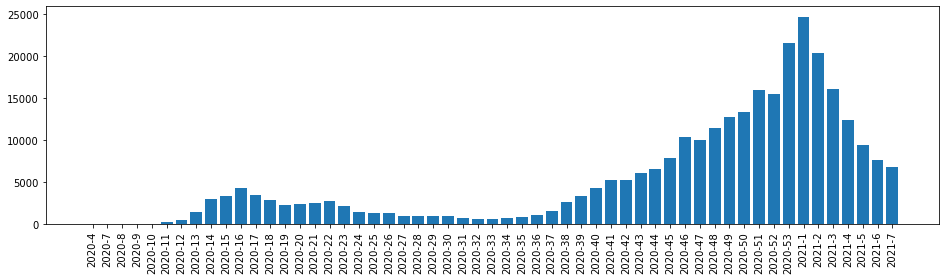

In [48]:
plt.figure(figsize=(16,4))
plt.bar(xAxis, yAxis)
plt.xticks(rotation=90)
plt.show()